In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-loan-data-analysis/loan_data.csv


In [87]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
loan = pd.read_csv('../input/lending-club-loan-data-analysis/loan_data.csv')

In [89]:
loan.head(5)



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [90]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [91]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory data analyasis

<AxesSubplot:xlabel='fico', ylabel='Count'>

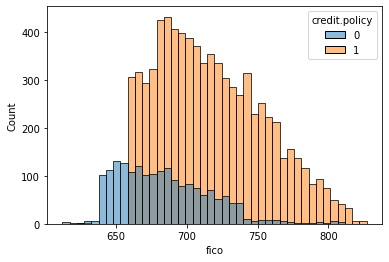

In [92]:
sb.histplot(data=loan,x='fico',hue='credit.policy')

<AxesSubplot:xlabel='fico', ylabel='Count'>

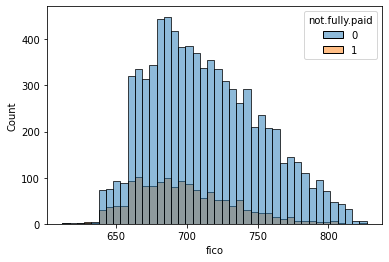

In [93]:
sb.histplot(data=loan,x='fico',hue='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

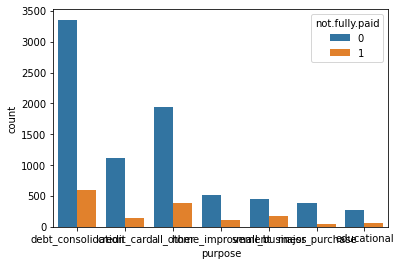

In [94]:
sb.countplot(data=loan,x='purpose',hue="not.fully.paid",)

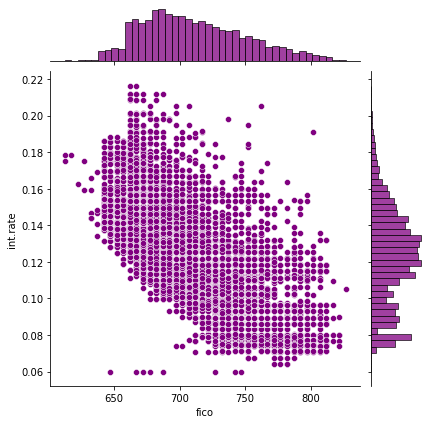

In [95]:
sb.jointplot(data=loan,x='fico',y='int.rate',color="purple")

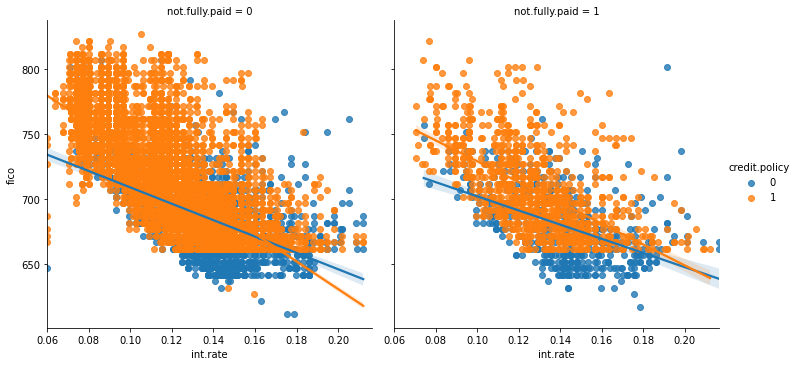

In [96]:
sb.lmplot(x="int.rate",y="fico",hue="credit.policy",col='not.fully.paid',data=loan)

# setting up data

In [97]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [98]:
cat_feats = ['purpose']
cat_feats

['purpose']

In [99]:
finalData = pd.get_dummies(loan,columns=cat_feats,drop_first=True)

In [100]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# training and testing 

In [101]:
from sklearn.model_selection import train_test_split as tts


In [102]:
X = finalData.drop('not.fully.paid',axis=1)
y = finalData['not.fully.paid']

In [104]:
xtrain,xtest,ytrain,ytest= tts(X,y,test_size=0.3,random_state=101)

# Training a Decision tree model

In [105]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [106]:
dtc = DTC()

In [107]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Prediction and evaluation

In [109]:
preds = dtc.predict(xtest)

In [110]:
from sklearn.metrics import confusion_matrix as cMat , classification_report as cFReport


In [112]:
print(cMat(ytest,preds),'\n')
print(cFReport(ytest,preds))

[[1986  445]
 [ 333  110]] 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [113]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [114]:
rfc = RFC()

In [115]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [116]:
preds2 = rfc.predict(xtest)

In [117]:
print(cMat(ytest,preds2),'\n')
print(cFReport(ytest,preds2))

[[2420   11]
 [ 434    9]] 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.45      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

